In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

In [2]:
chr15_ld = pd.read_csv('chr15_ld.ld', delim_whitespace=True)

In [3]:
min_pos = 71602339
max_pos = 71632339

In [4]:
chr15_ld = chr15_ld[(chr15_ld['BP_A'] >= min_pos) & (chr15_ld['BP_B'] <= max_pos)]

In [5]:
chr15_ld['CHR'] = 'chr15'
chr15_ld['BP_A_start'] = chr15_ld['BP_A'] - 1
chr15_ld['BP_B_start'] = chr15_ld['BP_B'] - 1

chr15_ld[['CHR', 'BP_A_start', 'BP_A']].to_csv('hg19_15_A.bed', sep = '\t', index=False, header=None)
chr15_ld[['CHR', 'BP_B_start', 'BP_B']].to_csv('hg19_15_B.bed', sep = '\t', index=False, header=None)

In [6]:
### suffix is window size
chr15_38_A = pd.read_csv('hg38_15_A_30k.bed', sep='\t', header=None)
chr15_38_B = pd.read_csv('hg38_15_B_30k.bed', sep='\t', header=None)

In [7]:
chr15_ld['BP_A_38'] = chr15_38_A[2].tolist()
chr15_ld['BP_B_38'] = chr15_38_B[2].tolist()

In [8]:
frq_d = '/net/bmc-lab5/data/kellis/group/tanigawa/data/alkesgroup/LDSCORE/1000G_Phase3_frq'
afs = []
for i in np.arange(1, 23):
    df = pd.read_csv(f'{frq_d}/1000G.EUR.QC.{i}.frq', sep='\s+')
    afs.append(df)

In [9]:
af = pd.concat(afs)

In [10]:
chr15_ld = chr15_ld.merge(af[['SNP', 'MAF']], left_on='SNP_A', right_on='SNP', how='left')
chr15_ld = chr15_ld.rename(columns={'MAF': 'MAF_A'})
chr15_ld = chr15_ld.merge(af[['SNP', 'MAF']], left_on='SNP_B', right_on='SNP', how='left')
chr15_ld = chr15_ld.rename(columns={'MAF': 'MAF_B'})

In [11]:
chr15_ld = chr15_ld[chr15_ld['MAF_A'] >= 0.2]
chr15_ld = chr15_ld[chr15_ld['MAF_B'] >= 0.2]

In [12]:
snp_of_interest = chr15_ld[(chr15_ld['SNP_A'] == 'rs11853359') | (chr15_ld['SNP_B'] == 'rs11853359')]

In [13]:
pivot = chr15_ld.pivot(columns='BP_A_38', index='BP_B_38', values='R2')
positions = sorted(set(chr15_ld['BP_A_38'].tolist() + chr15_ld['BP_B_38'].tolist()))

In [14]:
square_ld_matrix = pd.DataFrame(index=positions, columns=positions, dtype=float)
for idx in pivot.index:
    for col in pivot.columns:
        square_ld_matrix.loc[idx, col] = pivot.loc[idx, col]

np.fill_diagonal(square_ld_matrix.values, 1)
square_ld_matrix = square_ld_matrix.fillna(0)

In [15]:
snp_pos = square_ld_matrix.index.get_loc(71329185)

# Create list of (row, col) positions to highlight
highlight_coords = [(snp_pos, i) for i in range(len(square_ld_matrix))]
highlight_coords += [(i, snp_pos) for i in range(len(square_ld_matrix))]

In [16]:
snp_a = chr15_ld[['SNP_A', 'BP_A_38']]
snp_a = snp_a.rename(columns={'SNP_A': 'SNP', 'BP_A_38':'BP'})
snp_b = chr15_ld[['SNP_B', 'BP_B_38']]
snp_b = snp_b.rename(columns={'SNP_B': 'SNP', 'BP_B_38':'BP'})

rs_df = pd.concat([snp_a, snp_b]).drop_duplicates()
rs_dict = dict(zip(rs_df['BP'], rs_df['SNP']))

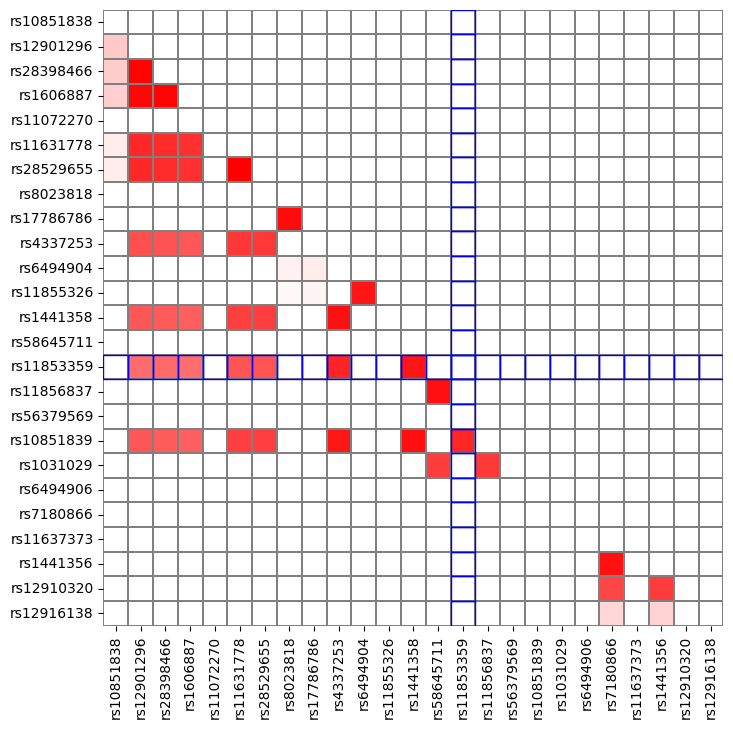

In [17]:
plt.figure(figsize=(8, 8))
white_red = LinearSegmentedColormap.from_list("white_red", ["white", "red"])
mask = np.triu(np.ones_like(square_ld_matrix, dtype=bool))
ax = sns.heatmap(square_ld_matrix, cmap=white_red, vmin=0.7, vmax=1,
                 cbar_kws={'label': 'LD (R²)'}, mask=mask, fmt='.3g', annot=False, cbar=False, linewidths=0.005, linecolor="gray")

start_pos = chr15_ld['BP_A_38'].min()  # 71.25 Mb in bp
bin_size = 50_000
# Precompute the tick positions starting from 71.25 Mb
genomic_ticks = np.arange(start_pos, positions[-1] + 1, bin_size)



# Find the closest index to each tick
tick_locs = [np.argmin(np.abs(positions - t)) for t in genomic_ticks]
tick_labels = [f"-{t / 1e6:.2f}" for t in genomic_ticks]

# Add annotations
#for idx, label in zip(tick_locs, tick_labels):
    #ax.text(idx, idx - 10, label,
            #ha='center', va='bottom', fontsize=8, color='black', rotation=45)


for y, x in highlight_coords:
    ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='blue', lw=1))

pos = plt.gca().get_xticks();
labels = plt.gca().get_xticklabels();
label_text = [int(i.get_text()) for i in labels];
plt.xticks(pos, labels=[rs_dict[i] for i in label_text], rotation=90);
pos = plt.gca().get_yticks();
labels = plt.gca().get_yticklabels();
label_text = [int(i.get_text()) for i in labels];
plt.yticks(pos, labels=[rs_dict[i] for i in label_text], rotation=0);
#plt.tight_layout()

In [18]:
chr17_ld = pd.read_csv('chr17_ld.ld', delim_whitespace=True)

In [19]:
min_pos = 3876294
max_pos = 3884294

In [20]:
chr17_ld = chr17_ld[(chr17_ld['BP_A'] >= min_pos) & (chr17_ld['BP_B'] <= max_pos)]

In [21]:
chr17_ld['CHR'] = 'chr17'
chr17_ld['BP_A_start'] = chr17_ld['BP_A'] - 1
chr17_ld['BP_B_start'] = chr17_ld['BP_B'] - 1

chr17_ld[['CHR', 'BP_A_start', 'BP_A']].to_csv('hg19_17_A.bed', sep = '\t', index=False, header=None)
chr17_ld[['CHR', 'BP_B_start', 'BP_B']].to_csv('hg19_17_B.bed', sep = '\t', index=False, header=None)

In [22]:
chr17_38_A = pd.read_csv('/Users/xiaohetian/Desktop/hg38_17_A_8k.bed', sep='\t', header=None)
chr17_38_B = pd.read_csv('/Users/xiaohetian/Desktop/hg38_17_B_8k.bed', sep='\t', header=None)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/xiaohetian/Desktop/hg38_17_A_8k.bed'

In [ ]:
chr17_ld['BP_A_38'] = chr17_38_A[2].tolist()
chr17_ld['BP_B_38'] = chr17_38_B[2].tolist()

In [ ]:
chr17_ld = chr17_ld.merge(af[['SNP', 'MAF']], left_on='SNP_A', right_on='SNP', how='left')
chr17_ld = chr17_ld.rename(columns={'MAF': 'MAF_A'})
chr17_ld = chr17_ld.merge(af[['SNP', 'MAF']], left_on='SNP_B', right_on='SNP', how='left')
chr17_ld = chr17_ld.rename(columns={'MAF': 'MAF_B'})

In [ ]:
chr17_ld = chr17_ld[chr17_ld['MAF_A'] >= 0.1]
chr17_ld = chr17_ld[chr17_ld['MAF_B'] >= 0.1]

In [ ]:
snp_of_interest = chr17_ld[(chr17_ld['SNP_A'] == 'rs7215084') | (chr17_ld['SNP_B'] == 'rs7215084')]

In [ ]:
pivot = chr17_ld.pivot(columns='BP_A_38', index='BP_B_38', values='R2')
positions = sorted(set(chr17_ld['BP_A_38'].tolist() + chr17_ld['BP_B_38'].tolist()))

square_ld_matrix = pd.DataFrame(index=positions, columns=positions, dtype=float)
for idx in pivot.index:
    for col in pivot.columns:
        square_ld_matrix.loc[idx, col] = pivot.loc[idx, col]


np.fill_diagonal(square_ld_matrix.values, 1)
square_ld_matrix = square_ld_matrix.fillna(0)